In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textwrap import wrap
import numpy as np

In [2]:
df = pd.read_csv('trainhomework.csv')
df.sample(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
152000,T1152001,67,S2,L5,R1,2019-02-21,0,No,8,4458.00
127063,T1127064,288,S3,L2,R3,2018-12-15,0,No,98,59880.00
32363,T1032364,194,S1,L1,R2,2018-03-30,1,Yes,43,28373.76
75852,T1075853,301,S1,L3,R2,2018-07-27,0,Yes,69,41949.00
63769,T1063770,222,S4,L2,R2,2018-06-24,0,No,122,71103.00


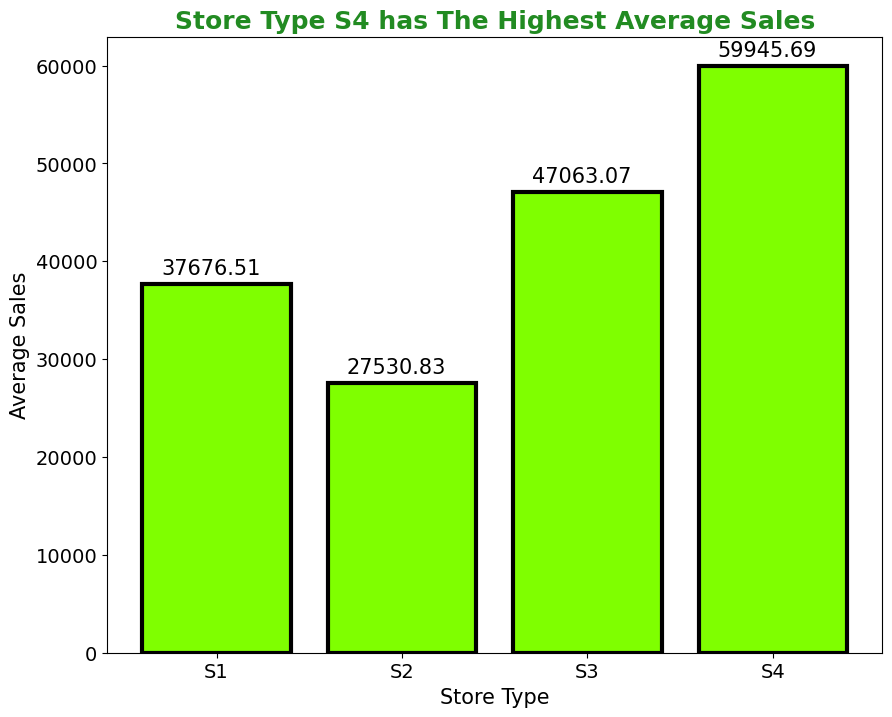

In [41]:
dfg = df.groupby(['Store_Type'])['Sales'].mean().reset_index(name='average_sales')

x = dfg['Store_Type']
y = dfg['average_sales']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'chartreuse', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('Store Type S4 has The Highest Average Sales',color='forestgreen',fontsize=18,fontweight='bold')

plt.ylabel('Average Sales', fontsize=15) # y axis label
plt.xlabel('Store Type', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.3 , y = y[i]+1000, s = round(y[i], 2), size = 15) # add data points

#plt.ylim(0, 62000)
#plt.tight_layout()

C:\Users\HARRY RIALDI\AppData\Local\Temp\ipykernel_11740\3702060271.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, store_type] / 2,


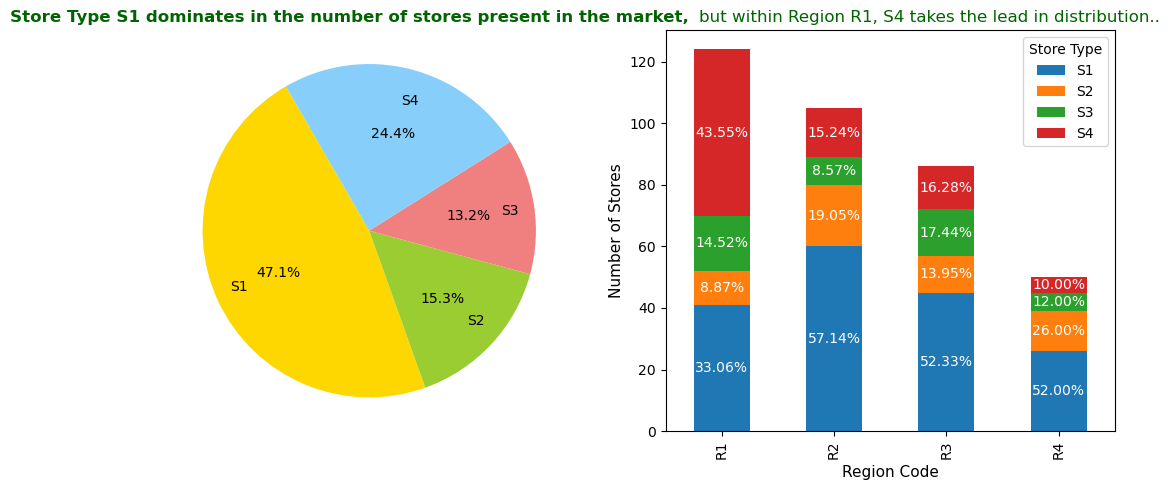

In [6]:
# Membuat data untuk barchart
df_grouped = df.groupby(['Region_Code', 'Store_Type'])['Store_id'].nunique().unstack()

# Membuat data untuk pie chart
store_type_counts = df.groupby('Store_Type')['Store_id'].nunique()
labels = store_type_counts.index
sizes = store_type_counts.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Membuat figure dan subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120, labeldistance=0.8)
ax1.axis('equal')  # Menyamakan sumbu x dan y sehingga pie chart menjadi lingkaran
ax1.set_title('Store Type S1 dominates in the number of stores present in the market,', color='darkgreen', fontsize=12, fontweight='bold', loc='left', x=-0.3)

# Plotting barchart
df_grouped.plot(kind='bar', stacked=True, ax=ax2)

ax2.set_title('but within Region R1, S4 takes the lead in distribution..', fontsize=12, fontweight='normal', color='darkgreen', loc='right', x=1.1)
ax2.set_xlabel('Region Code', fontsize=11)
ax2.set_ylabel('Number of Stores', fontsize=11)
ax2.legend(title='Store Type')

# Menambahkan teks persentase untuk setiap Store Type
for i, region_code in enumerate(df_grouped.index):
    total_stores = df_grouped.loc[region_code].sum()
    for j, store_type in enumerate(df_grouped.columns):
        percentage = df_grouped.loc[region_code, store_type] / total_stores * 100
        ax2.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, store_type] / 2,
                 f'{percentage:.2f}%', ha='center', va='center', color='white')

# Menampilkan plot
plt.tight_layout()
plt.show()

C:\Users\HARRY RIALDI\AppData\Local\Temp\ipykernel_11740\949667247.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, location_type] / 2,


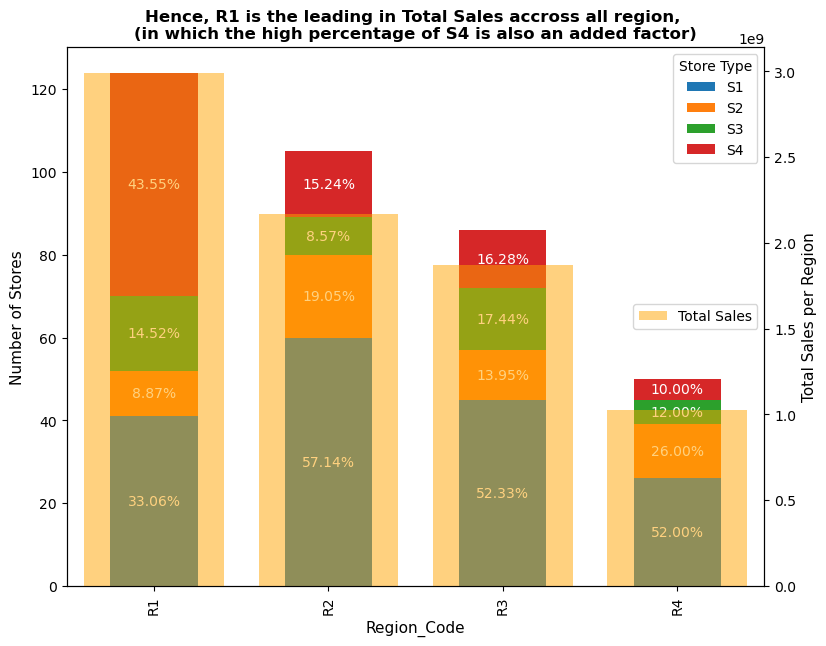

In [7]:
# Hitung total penjualan per kategori Region_Code
total_sales_per_region = df.groupby('Region_Code')['Sales'].sum()

# Plotting stacked bar chart
fig, ax1 = plt.subplots(figsize=(9, 7))

# Plot bar chart for store counts
df_grouped.plot(kind='bar', stacked=True, ax=ax1)

# Adding labels and title for the left y-axis
ax1.set_title('Hence, R1 is the leading in Total Sales accross all region, \n(in which the high percentage of S4 is also an added factor)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Region_Code', fontsize=11)
ax1.set_ylabel('Number of Stores', fontsize=11)
ax1.legend(title='Store Type')

# Adding percentage text for each Location Type
for i, region_code in enumerate(df_grouped.index):
    total_stores = df_grouped.loc[region_code].sum()
    for j, location_type in enumerate(df_grouped.columns):
        percentage = df_grouped.loc[region_code, location_type] / total_stores * 100
        ax1.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, location_type] / 2,
                 f'{percentage:.2f}%', ha='center', va='center', color='white')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot total sales per region on the second y-axis
bars = ax2.bar(total_sales_per_region.index, total_sales_per_region.values, color='orange', alpha=0.5)
ax2.set_ylabel('Total Sales per Region', fontsize=11)

# Add legend for total sales bars
ax2.legend([bars], ['Total Sales'], loc='center right')

plt.show()

C:\Users\HARRY RIALDI\AppData\Local\Temp\ipykernel_11740\663440590.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, location_type] / 2,


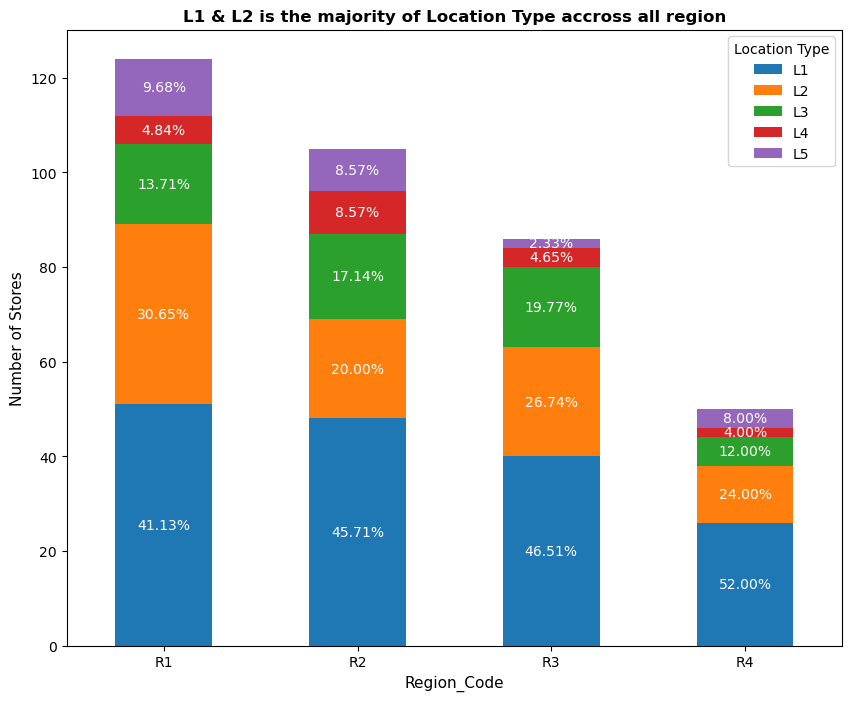

In [8]:
df_grouped = df.groupby(['Region_Code', 'Location_Type'])['Store_id'].nunique().unstack()

# Plotting stacked bar chart
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 8))

# Adding labels and title
plt.title('L1 & L2 is the majority of Location Type accross all region', fontsize=12, fontweight='bold')
plt.xlabel('Region_Code', fontsize=11)
plt.ylabel('Number of Stores', fontsize=11)
plt.xticks(rotation=0)
plt.legend(title='Location Type')

# Adding percentage text for each Location Type
for i, region_code in enumerate(df_grouped.index):
    total_stores = df_grouped.loc[region_code].sum()
    for j, location_type in enumerate(df_grouped.columns):
        percentage = df_grouped.loc[region_code, location_type] / total_stores * 100
        plt.text(i, df_grouped.loc[region_code].cumsum()[j] - df_grouped.loc[region_code, location_type] / 2,
                 f'{percentage:.2f}%', ha='center', va='center', color='white')

plt.show()

C:\Users\HARRY RIALDI\AppData\Local\Temp\ipykernel_11740\3067427428.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0].text(i, df_grouped.loc[location_type].cumsum()[j] - df_grouped.loc[location_type, store_type] / 2,
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


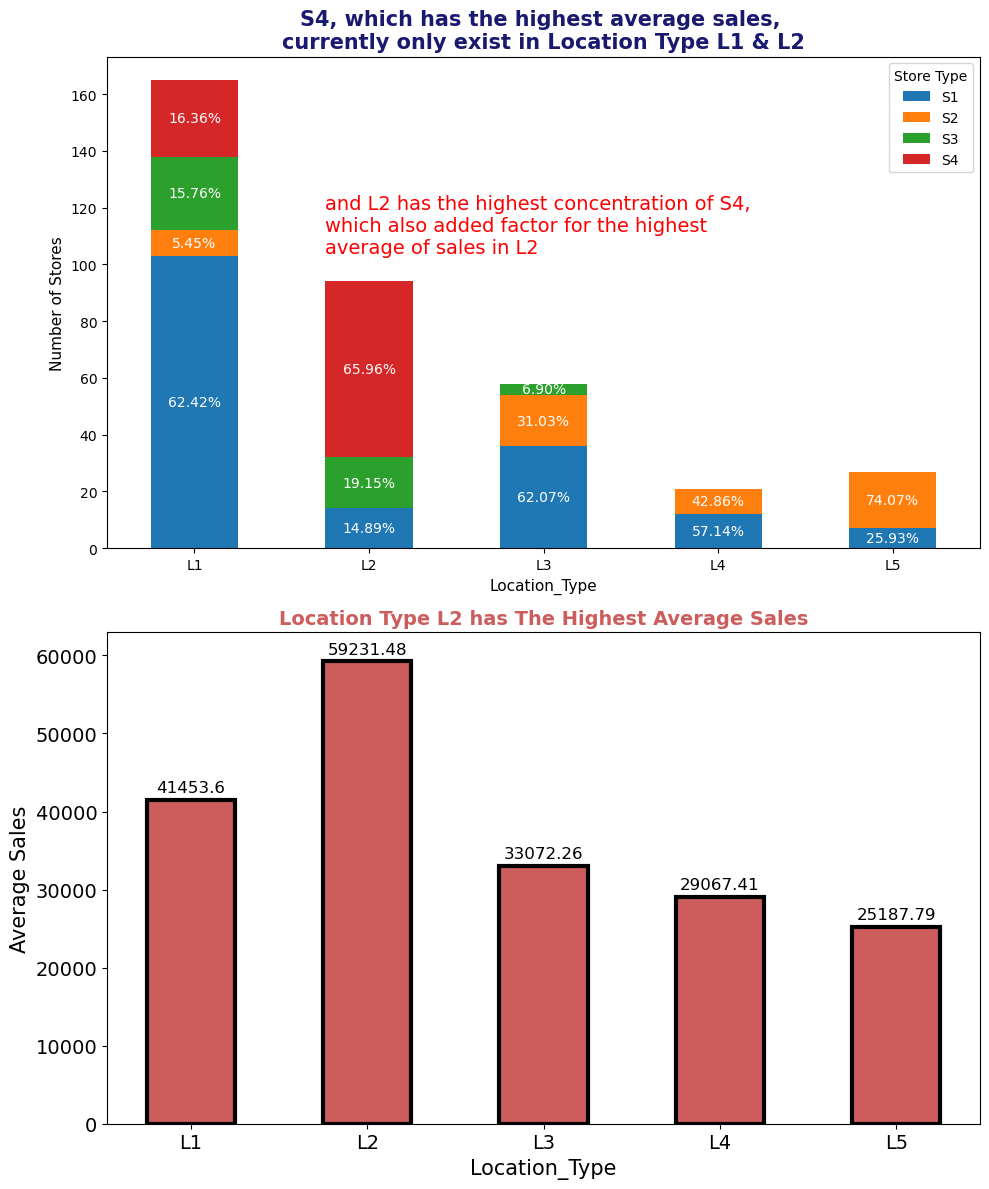

In [9]:
# Data untuk grafik pertama
df_grouped = df.groupby(['Location_Type', 'Store_Type'])['Store_id'].nunique().unstack()

# Plotting stacked bar chart untuk grafik pertama
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot grafik pertama
df_grouped.plot(kind='bar', stacked=True, ax=axs[0])

# Adding labels and title for the bar chart pertama
axs[0].set_title('S4, which has the highest average sales, \ncurrently only exist in Location Type L1 & L2', fontsize=15, fontweight='bold', color='midnightblue')
axs[0].set_xlabel('Location_Type', fontsize=11)
axs[0].set_ylabel('Number of Stores', fontsize=11)
axs[0].set_xticklabels(df_grouped.index, rotation=0)
axs[0].legend(title='Store Type')

# Adding percentage text for each Location Type
for i, location_type in enumerate(df_grouped.index):
    total_stores = df_grouped.loc[location_type].sum()
    for j, store_type in enumerate(df_grouped.columns):
        percentage = df_grouped.loc[location_type, store_type] / total_stores * 100
        axs[0].text(i, df_grouped.loc[location_type].cumsum()[j] - df_grouped.loc[location_type, store_type] / 2,
                 f'{percentage:.2f}%', ha='center', va='center', color='white')

# Adding custom text for grafik pertama
axs[0].text(0.25, 0.6, "and L2 has the highest concentration of S4,\nwhich also added factor for the highest \naverage of sales in L2",
         transform=axs[0].transAxes, fontsize=14, color='red', horizontalalignment='left')

# Data untuk grafik kedua
dfg = df.groupby(['Location_Type'])['Sales'].mean().reset_index(name='average_sales')

# Plotting grafik kedua
axs[1].bar(x=dfg['Location_Type'], height=dfg['average_sales'], color='indianred', edgecolor='black', linewidth=3, width=0.5)

# Adding labels and title for grafik kedua
axs[1].set_title('Location Type L2 has The Highest Average Sales', color='indianred', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Location_Type', fontsize=15)
axs[1].set_ylabel('Average Sales', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=14)

# Menambahkan angka data
for i, v in enumerate(dfg['average_sales']):
    axs[1].text(i, v + 1000, str(round(v, 2)), ha='center', fontsize=12)

plt.ylim(0, 63000)
plt.tight_layout()
plt.show()

In [3]:
df['timestamp'] = pd.to_datetime(df['Date'])

In [4]:
# Menambahkan kolom day dan month dan year
df['Day'] = df['timestamp'].dt.day
df['Month'] = df['timestamp'].dt.month
df['Year'] = df['timestamp'].dt.year

df.sample(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,timestamp,Day,Month,Year
169660,T1169661,28,S3,L2,R3,2019-04-10,0,No,61,37818.0,2019-04-10,10,4,2019
58752,T1058753,252,S3,L2,R1,2018-06-10,0,No,84,56985.0,2018-06-10,10,6,2018
90707,T1090708,218,S1,L3,R2,2018-09-06,0,No,53,29160.0,2018-09-06,6,9,2018
83091,T1083092,270,S1,L1,R2,2018-08-16,0,No,40,23985.0,2018-08-16,16,8,2018
133454,T1133455,42,S1,L4,R3,2019-01-01,1,No,20,14059.2,2019-01-01,1,1,2019


In [118]:
# Dictionary untuk memetakan angka bulan ke nama bulan
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Mengubah nilai bulan dari angka menjadi nama bulan
df['Month'] = df['Month'].map(month_map)

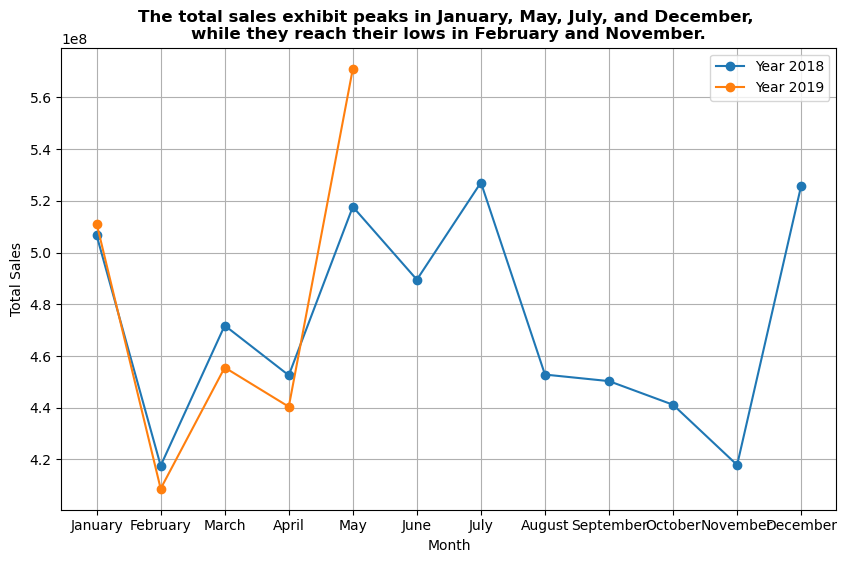

In [127]:
# Mengelompokkan data berdasarkan year dan month, dan menghitung total sales
grouped1 = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical with specified order
grouped1['Month'] = pd.Categorical(grouped1['Month'], categories=month_order, ordered=True)

# Membuat plot untuk setiap tahun
plt.figure(figsize=(10, 6))
years = grouped1['Year'].unique()
for year in years:
    subset = grouped1[grouped1['Year'] == year]
    # Sort by 'Month' to ensure correct ordering
    subset = subset.sort_values('Month')
    plt.plot(subset['Month'], subset['Sales'], marker='o', label=f'Year {year}')

# Menambahkan label dan judul
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('The total sales exhibit peaks in January, May, July, and December, \nwhile they reach their lows in February and November.', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

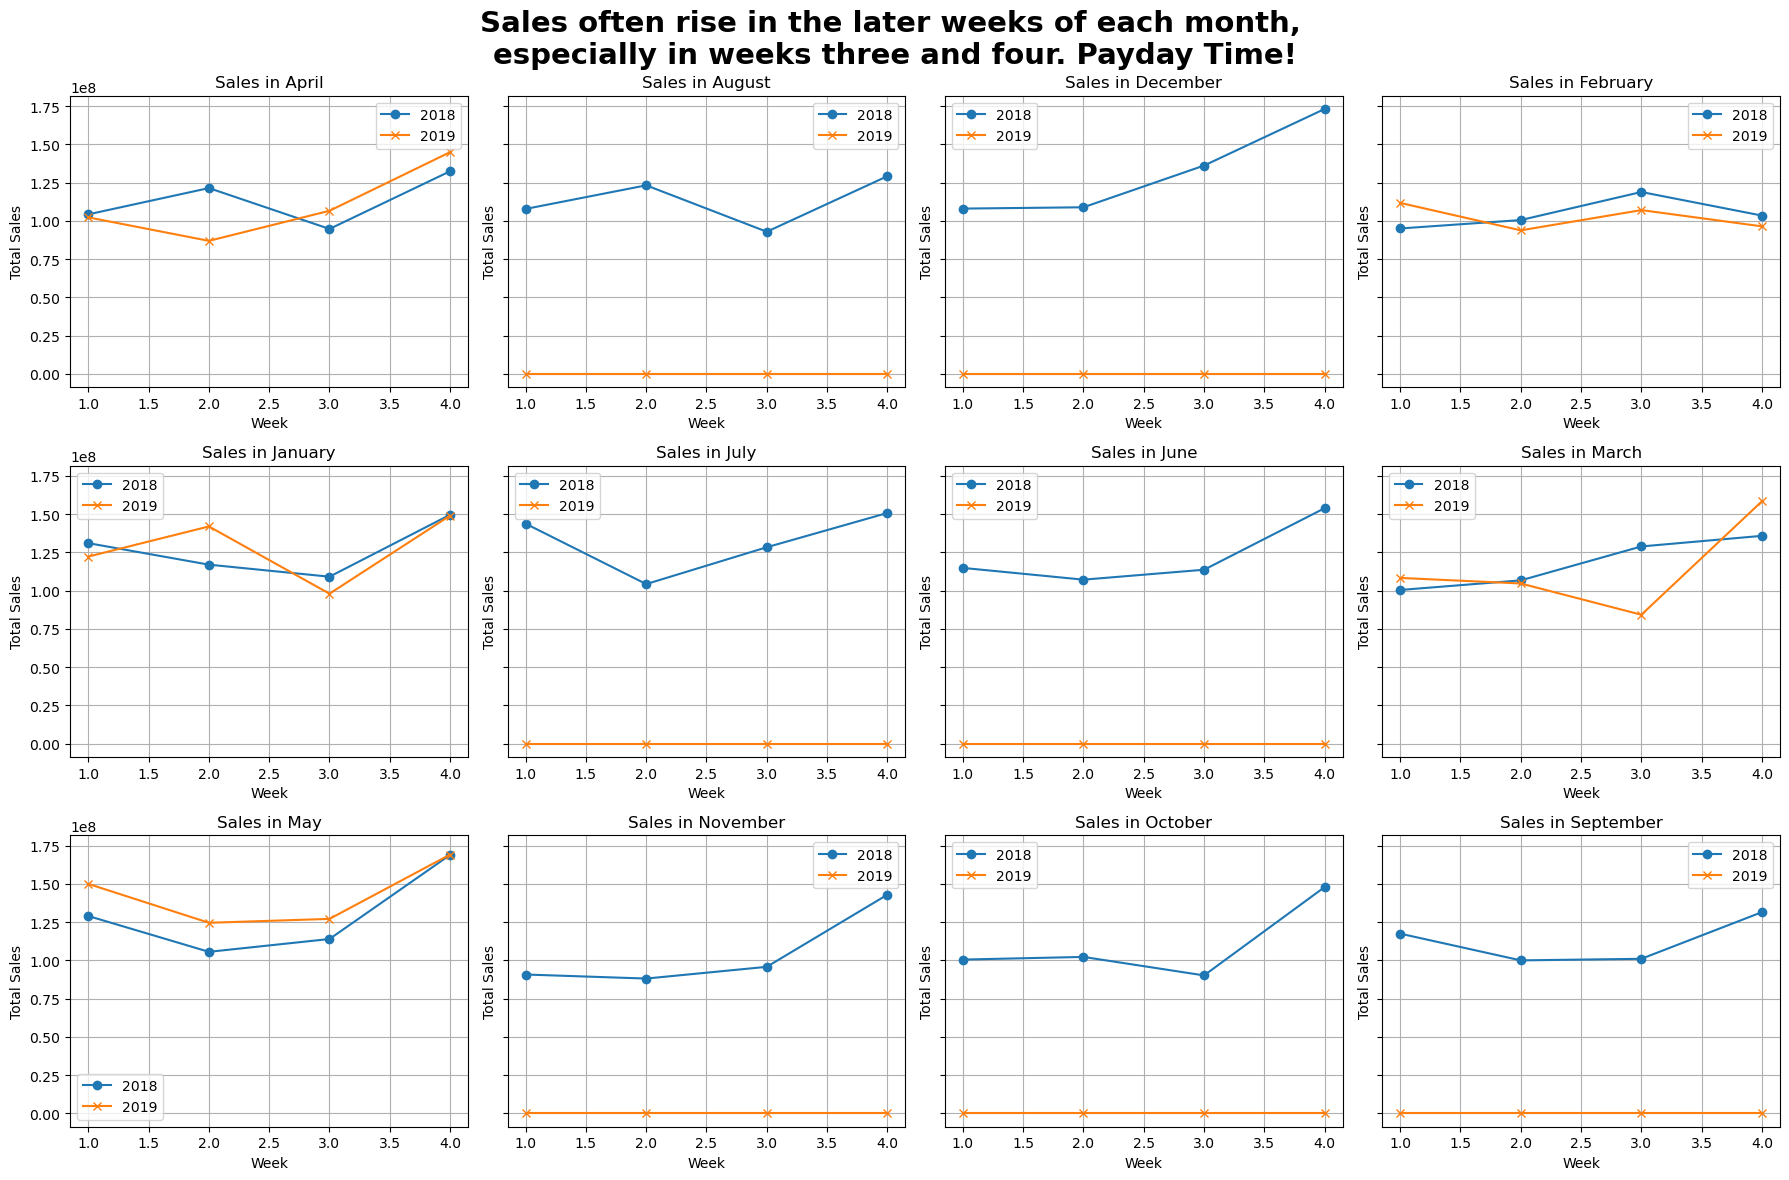

In [132]:
# Create a 'Week' column
df['Day'] = df['Day'].astype(int)
df['Week'] = np.where(df['Day'] <= 7, 1, 
                      np.where(df['Day'] <= 14, 2,
                               np.where(df['Day'] <= 21, 3, 4)))
# Turn 'week' and 'day' into categorical feature
df['Week'] = df['Week'].astype('object')
df['Day'] = df['Day'].astype('object')


#  Aggregate the sum of sales by month, week, and year
sales_trend = df.groupby(['Year', 'Month', 'Week'])['Sales'].sum().reset_index()

# Step 4: Use pivot_table to build the data for plotting
pivot_table_2018 = sales_trend[sales_trend['Year'] == 2018].pivot_table(index='Week', columns='Month', values='Sales')
pivot_table_2019 = sales_trend[sales_trend['Year'] == 2019].pivot_table(index='Week', columns='Month', values='Sales')

# Combine the pivot tables and fill missing values with 0
all_months = sorted(set(pivot_table_2018.columns).union(set(pivot_table_2019.columns)))
pivot_table_2018 = pivot_table_2018.reindex(columns=all_months).fillna(0)
pivot_table_2019 = pivot_table_2019.reindex(columns=all_months).fillna(0)

# Define the number of plots per line
plots_per_line = 4
num_months = len(all_months)

# Calculate the number of rows needed
num_rows = (num_months + plots_per_line - 1) // plots_per_line

# Create subplots with specified layout
fig, axes = plt.subplots(num_rows, plots_per_line, figsize=(18, num_rows * 4), sharey=True)

# Flatten axes if it's a single row
axes = axes.flatten()

# Plotting individual plots for each month
for i, month in enumerate(all_months):
    ax = axes[i]
    
    # Plot data for 2018
    if month in pivot_table_2018.columns:
        ax.plot(pivot_table_2018.index, pivot_table_2018[month], label='2018', marker='o')
    
    # Plot data for 2019
    if month in pivot_table_2019.columns:
        ax.plot(pivot_table_2019.index, pivot_table_2019[month], label='2019', marker='x')
    
    ax.set_title('Sales in {}'.format(month))
    ax.set_xlabel('Week')
    ax.set_ylabel('Total Sales')
    ax.legend()
    ax.grid(True)

# Remove empty subplots
for i in range(num_months, len(axes)):
    fig.delaxes(axes[i])
    
# Add big title to the entire figure
fig.suptitle('Sales often rise in the later weeks of each month, \nespecially in weeks three and four. Payday Time!', fontsize=21, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In [3]:
# Membuat dictionary yang memetakan integer ke string
mapping = {0: 'No', 1: 'Yes'}

# Mengubah tipe data kolom 'Holiday' dari integer menjadi objek
df['Holiday'] = df['Holiday'].map(mapping)

df.sample(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
85665,T1085666,135,S1,L1,R4,2018-08-23,No,Yes,52,37896.0
156698,T1156699,7,S3,L1,R3,2019-03-06,No,No,88,48312.0
128906,T1128907,56,S2,L5,R3,2018-12-20,No,Yes,46,34593.0
75796,T1075797,54,S1,L2,R3,2018-07-27,No,No,51,35475.0
148274,T1148275,61,S1,L1,R3,2019-02-11,No,No,49,27369.0


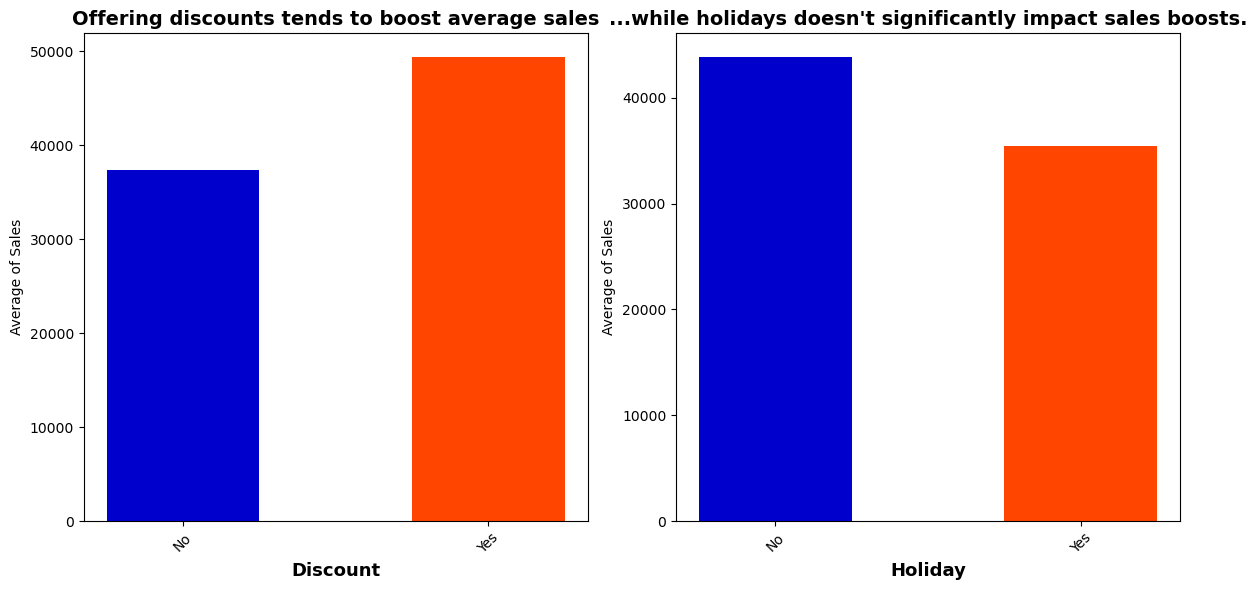

In [19]:
# Grafik 1: Group by 'Discount' and calculate sum of 'Sales'
sales_by_discount = df.groupby('Discount')['Sales'].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot pertama
plt.bar(sales_by_discount.index, sales_by_discount.values, width=0.5, color=['mediumblue', 'orangered'])
plt.xlabel('Discount', fontsize=13, fontweight='bold')
plt.ylabel('Average of Sales')
plt.title('Offering discounts tends to boost average sales', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Grafik 2: Group by 'Holiday' and calculate avg of 'Sales'
sales_by_holiday = df.groupby('Holiday')['Sales'].mean()

plt.subplot(1, 2, 2)  # Subplot kedua
plt.bar(sales_by_holiday.index, sales_by_holiday.values, width=0.5, color=['mediumblue', 'orangered'])
plt.xlabel('Holiday', fontsize=13, fontweight='bold')
plt.ylabel('Average of Sales')
plt.title("...while holidays doesn't significantly impact sales boosts.", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

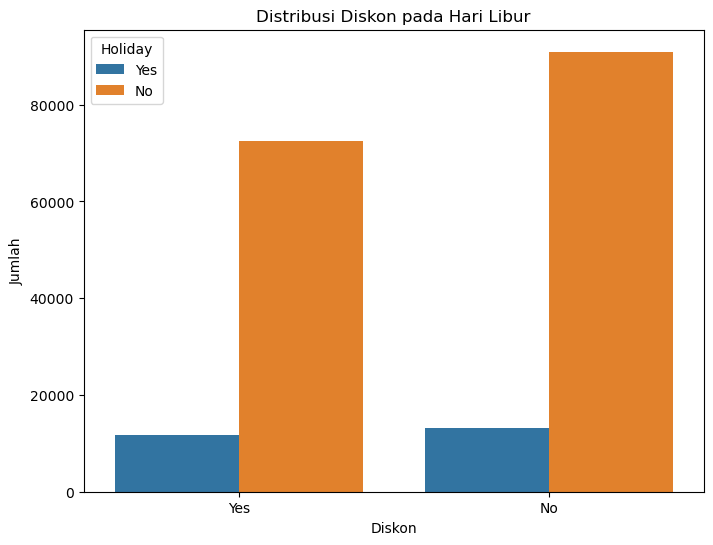

In [4]:
# Membuat plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Discount', hue='Holiday', data=df)

# Menambahkan judul dan label
plt.title('Distribusi Diskon pada Hari Libur')
plt.xlabel('Diskon')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

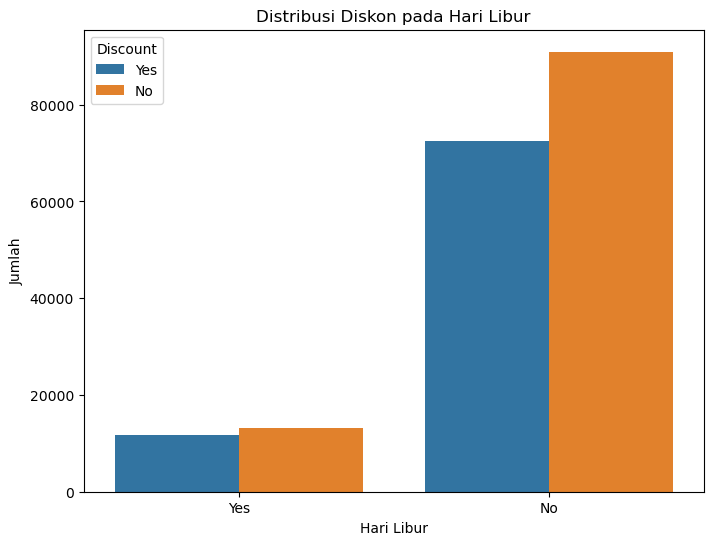

In [5]:
# Membuat plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Holiday', hue='Discount', data=df)

# Menambahkan judul dan label
plt.title('Distribusi Diskon pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

### Rekomendasi Bisnis Berdasarkan Insight:

1. **Fokuskan Upaya pada Store Type S4:** Melihat bahwa Store Type S4 memiliki penjualan rata-rata tertinggi, strategi bisnis sebaiknya difokuskan pada pengembangan dan peningkatan kualitas Store Type S4. Ini bisa berarti meningkatkan stok produk yang populer di toko-toko ini, memberikan pelatihan tambahan kepada staf, atau memperbaiki tata letak toko untuk meningkatkan kenyamanan pelanggan.

2. **Ekspansi Store Type S4 di Region R1:** Karena Region R1 memimpin dalam Total Penjualan dan memiliki konsentrasi Store Type S4 yang tinggi, strategi ekspansi harus diprioritaskan di wilayah ini. Hal ini bisa dilakukan dengan membuka lebih banyak toko tipe S4 di wilayah ini atau meningkatkan investasi pemasaran di sana.

3. **Penekanan pada Location Type L2:** Melihat bahwa Location Type L2 memiliki konsentrasi tertinggi dari Store Type S4 dan juga memiliki penjualan rata-rata tertinggi, fokuskan upaya bisnis pada lokasi ini. Ini bisa berarti memberikan lebih banyak sumber daya untuk promosi di lokasi ini atau meningkatkan ketersediaan produk yang paling diminati di sana.

4. **Strategi Penjualan Berdasarkan Tren Bulanan:** Karena penjualan cenderung naik pada akhir bulan, terutama menjelang akhir pekan gajian, bisnis sebaiknya menyesuaikan strategi penjualan mereka untuk memanfaatkan tren ini. Ini bisa berarti mengatur promosi atau penawaran spesial pada saat-saat ini untuk mendorong pembelian yang lebih besar.

5. **Memanfaatkan Periode Puncak Penjualan:** Dengan mengetahui bahwa penjualan mencapai puncaknya pada bulan Januari, Mei, Juli, dan Desember, bisnis dapat mempersiapkan diri dengan stok yang cukup dan strategi pemasaran yang efektif untuk memaksimalkan keuntungan selama periode ini.

6. **Penggunaan Diskon untuk Meningkatkan Penjualan Rata-rata:** Insight menunjukkan bahwa penawaran diskon cenderung meningkatkan penjualan rata-rata. Oleh karena itu, bisnis dapat mempertimbangkan untuk menggunakan strategi diskon secara lebih agresif untuk meningkatkan penjualan.


In [ ]:
count.